In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# for data splitting, transforming and model training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Undrestanding Data

In [6]:
df = pd.read_csv('C:\\Users\\Yash\\Documents\\Python Scripts\\ML\\Telco Customer Churn Prediction/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.drop(columns = ['customerID'], inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
# Finding missing values in df
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

gender - # unique values: 2
Partner - # unique values: 2
Dependents - # unique values: 2
PhoneService - # unique values: 2
MultipleLines - # unique values: 3
InternetService - # unique values: 3
OnlineSecurity - # unique values: 3
OnlineBackup - # unique values: 3
DeviceProtection - # unique values: 3
TechSupport - # unique values: 3
StreamingTV - # unique values: 3
StreamingMovies - # unique values: 3
Contract - # unique values: 3
PaperlessBilling - # unique values: 2
PaymentMethod - # unique values: 4
TotalCharges - # unique values: 6531
Churn - # unique values: 2


In [116]:
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

gender 

Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport 

No                     3473
Yes                    20

In [9]:
# Converting DataFrame column elements from string to float using the following code line :
# data['TotalCharges'] = data['TotalCharges'].astype(float)

# In summary, for each index in l2, this code sets the value in the 'TotalCharges' column to be the same as 
# the value from the previous index. It effectively duplicates the value from the previous row for those specific 
# indices where the number of words in 'TotalCharges' is not equal to 1.

l1 = [len(i.split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    df.loc[i,'TotalCharges'] = df.loc[(i-1),'TotalCharges']
    
df['TotalCharges'] = df['TotalCharges'].astype(float)


Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [118]:
print('Number of duplicated values in training dataset: ', df.duplicated().sum())

Number of duplicated values in training dataset:  22


In [10]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully


In [139]:
df.shape

(7021, 20)

In [31]:
# distinction is based on the number of different values in the column

columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding 'Churn'

# Exploratory Data Analysis

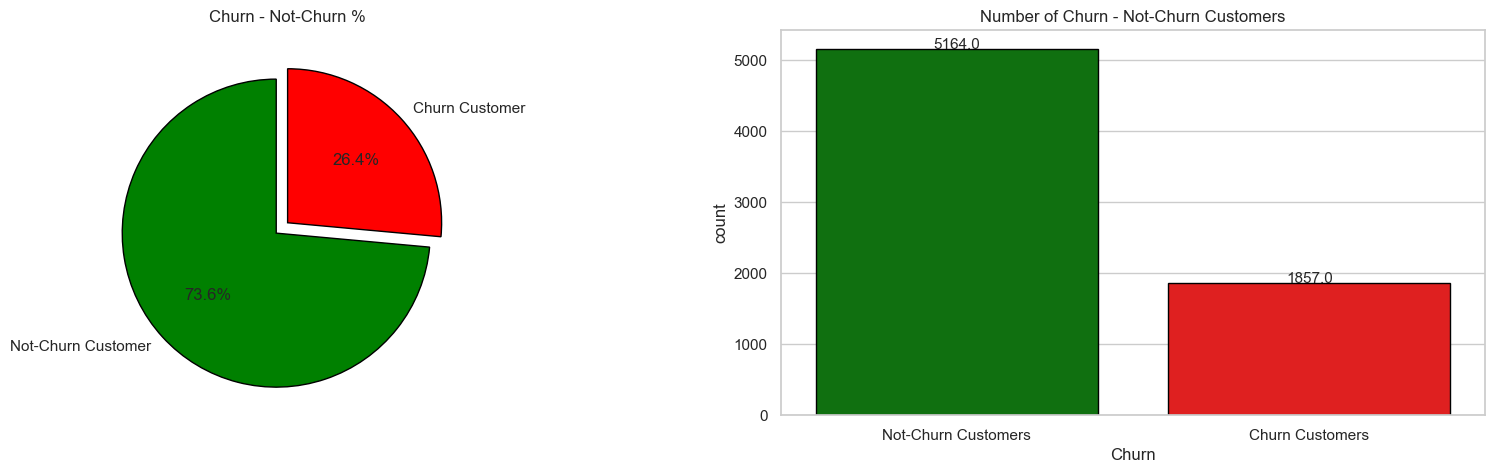

In [122]:
colors = ['green', 'red']

# Assuming df1 is your DataFrame
l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Pie chart
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axs[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%',
           startangle=90, explode=(0.1, 0), colors=colors,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axs[0].set_title('Churn - Not-Churn %')

# Count plot
axs[1] = sns.countplot(x='Churn', data=df, palette=colors, edgecolor='black')
for rect in axs[1].patches:
    axs[1].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

axs[1].set_xticklabels(['Not-Churn Customers', 'Churn Customers'])
axs[1].set_title('Number of Churn - Not-Churn Customers')

plt.show()


The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
Due to this, predictions will be biased towards Not-Churn customers.
Visualizations will also display this bias!
At the period represented in this dataset, there is a 26,5% rate of customer churn. As we move on to analyze the features, we can compare this number with the percentage of churn found for each category, providing us a better idea on the impact of a given feature in the company’s ability to retain its customers.

Categorical Features vs Target Variable (Churn):

We can divide the features into the following groups:

Demographic features;
Service-related features
Account information related features (categorical and numerical).
For each group, we’ll start by looking at the features’ distributions. Then, we’ll check the percentage of churn for each category to understand their relationship with the target.

In [123]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_accinfo_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_accinfo_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

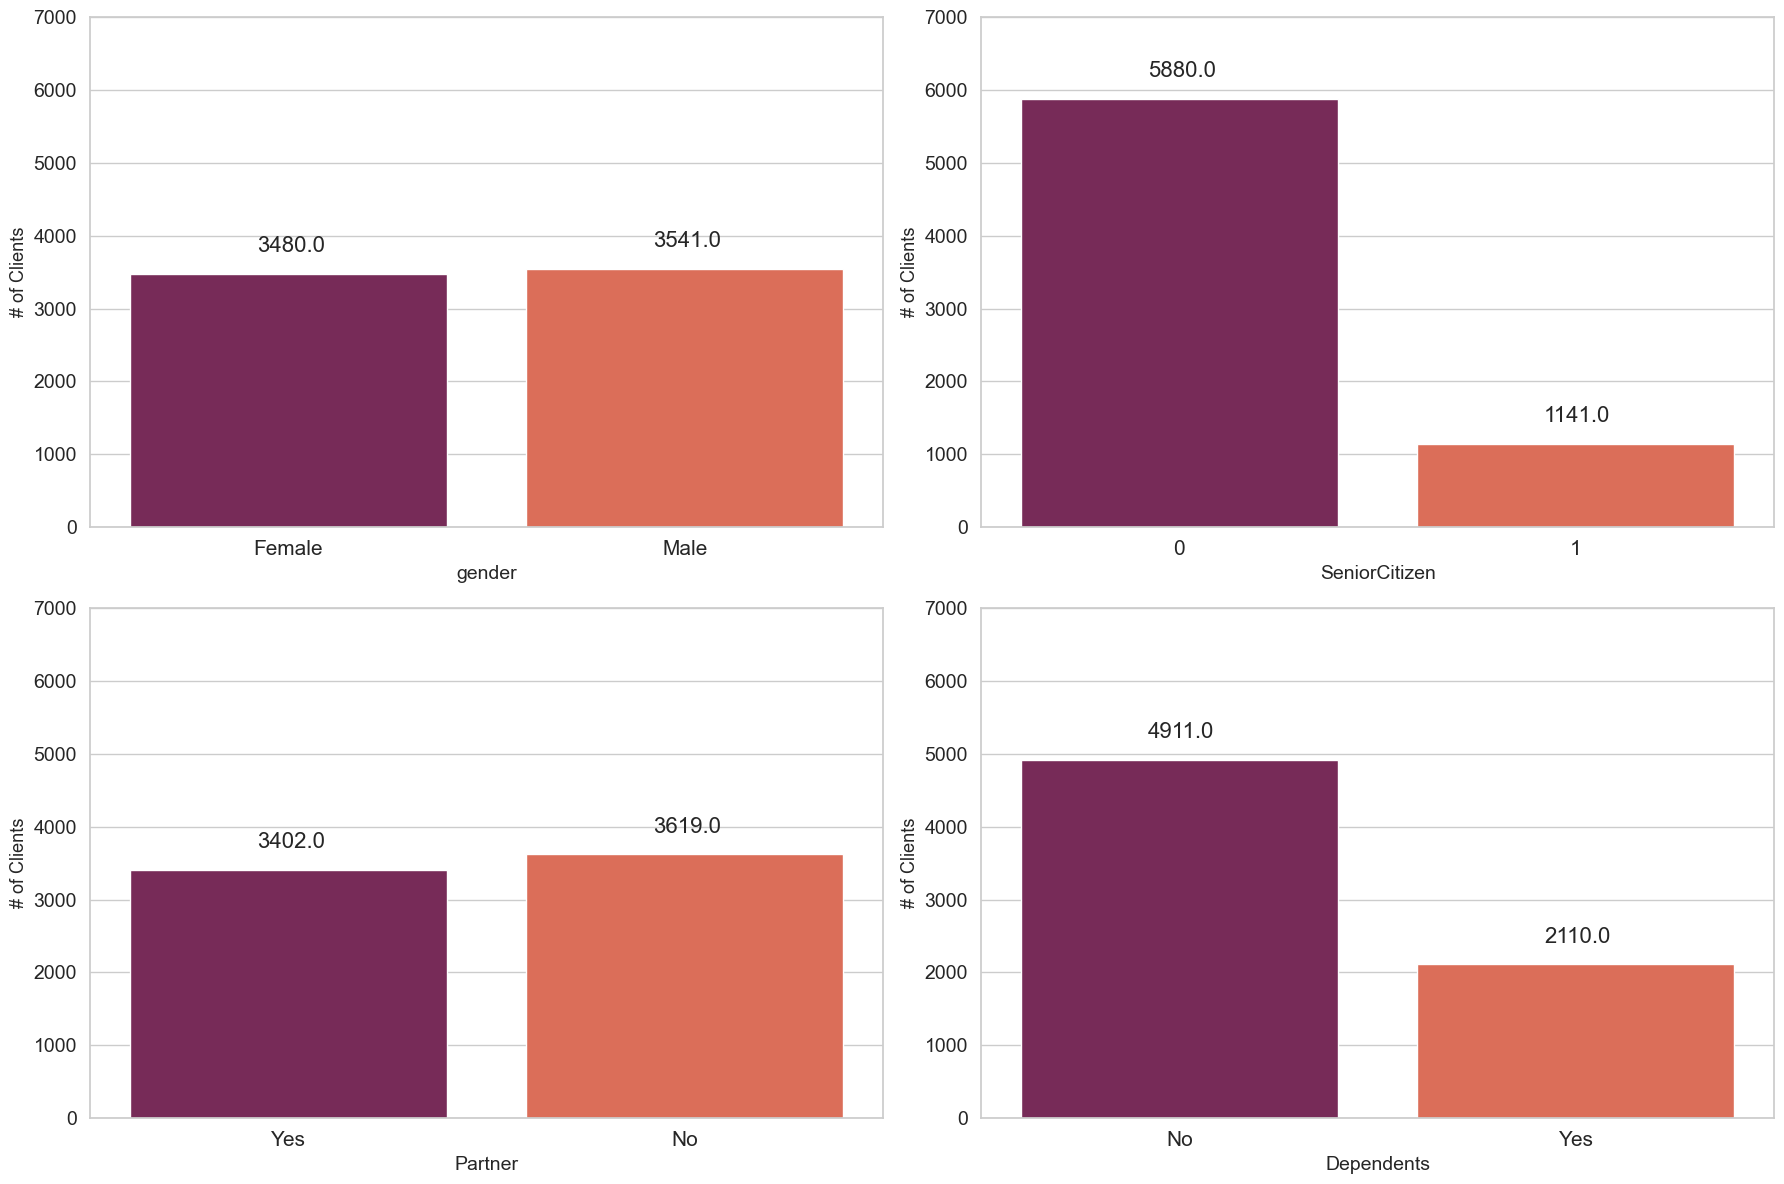

In [124]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

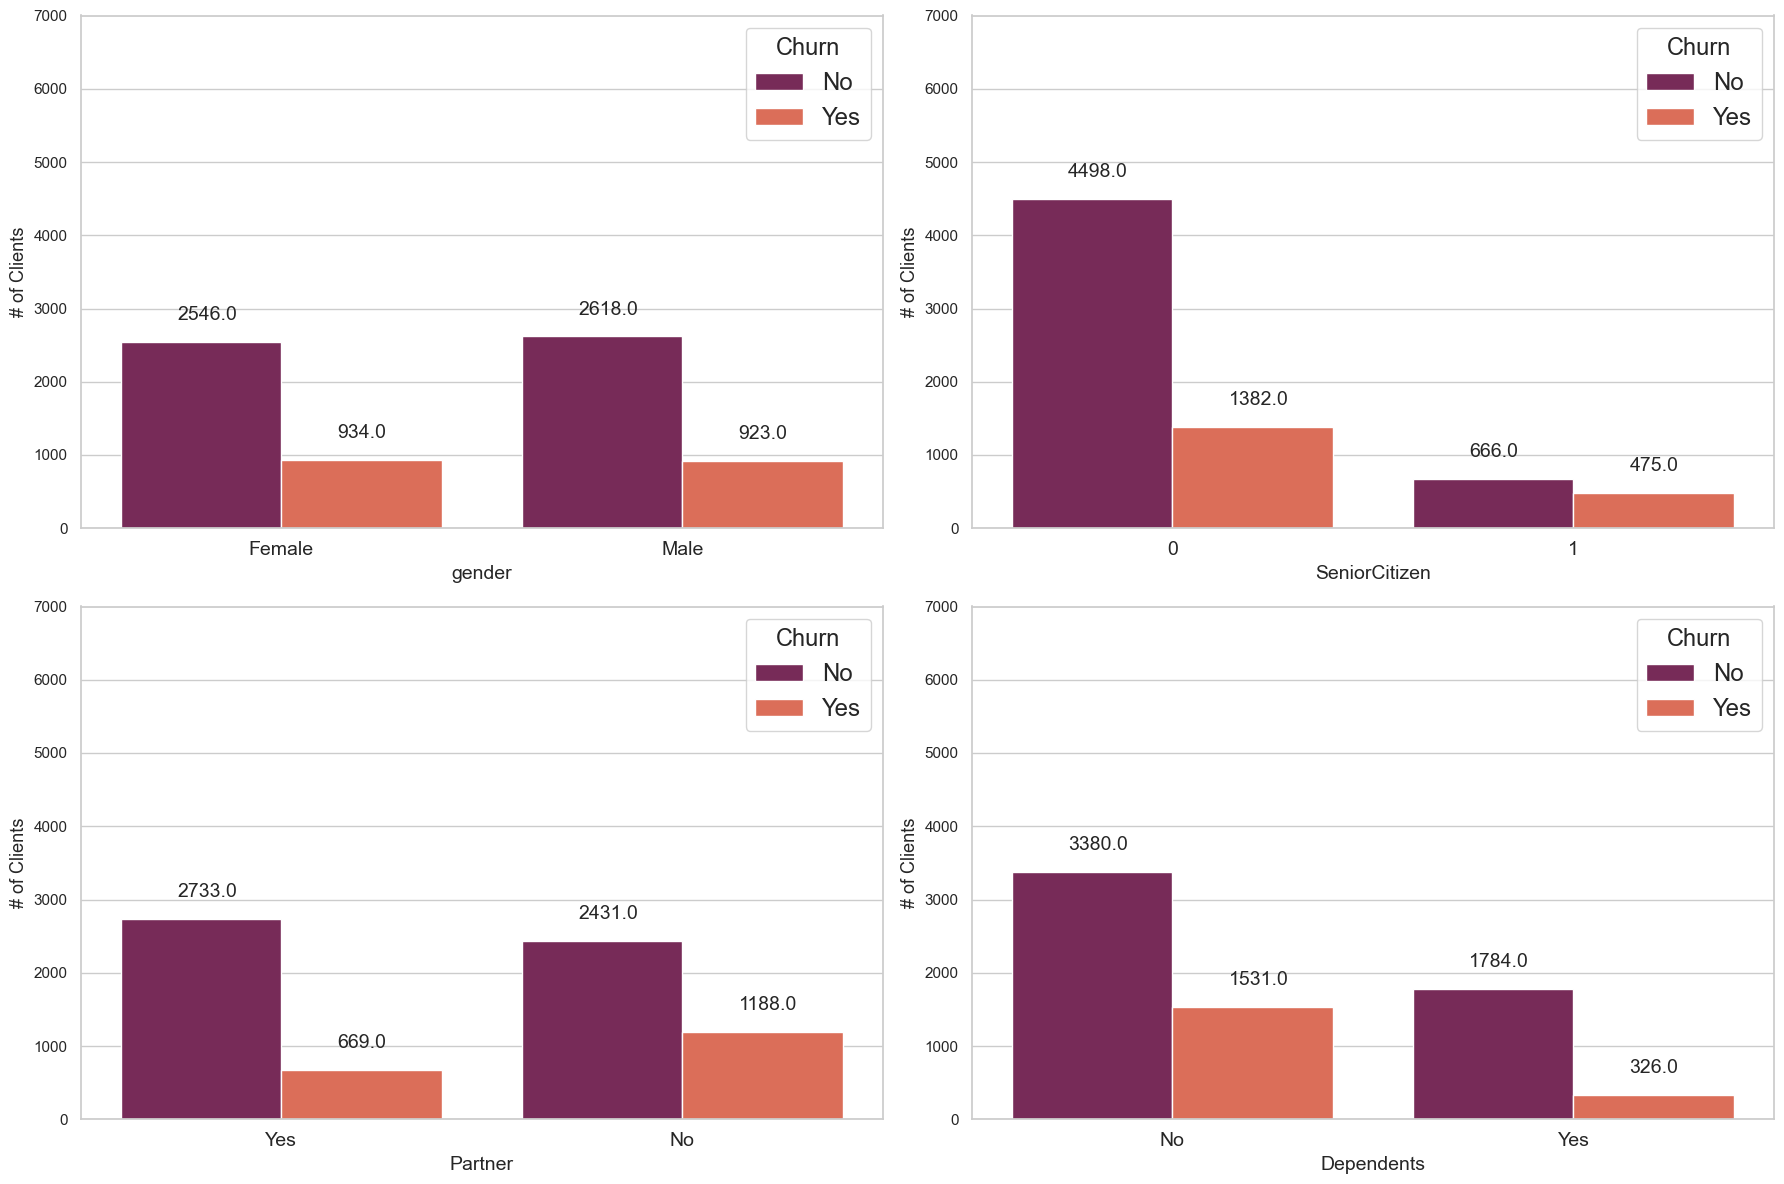

In [125]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

What we can observe for each feature:

Gender: There is barely any difference in churn percentage between men and women;
Senior Citizen: The churn percentage for senior customers are above 40%, indicating a high likelihood of churn from that group;
Partner: Single customers are more likely to churn than customers with partners;
Dependents: Customers with dependents are less likely to churn than customers without any dependents.
We could go a little further and combine the two ‘family-related’ features, ‘Partner’ and ‘Dependents’ to see if, in fact, both of them contribute to the chance of customer churn or retention.

It is expected that the majority of customers with dependents are married and, for instance, it could be that the partnership has more influence on the target than the fact that a customer has or hasn’t a child. Although this might be unlikely, by analyzing both features together, we can discard such hypothesis with more confidence.

# Services Related Features

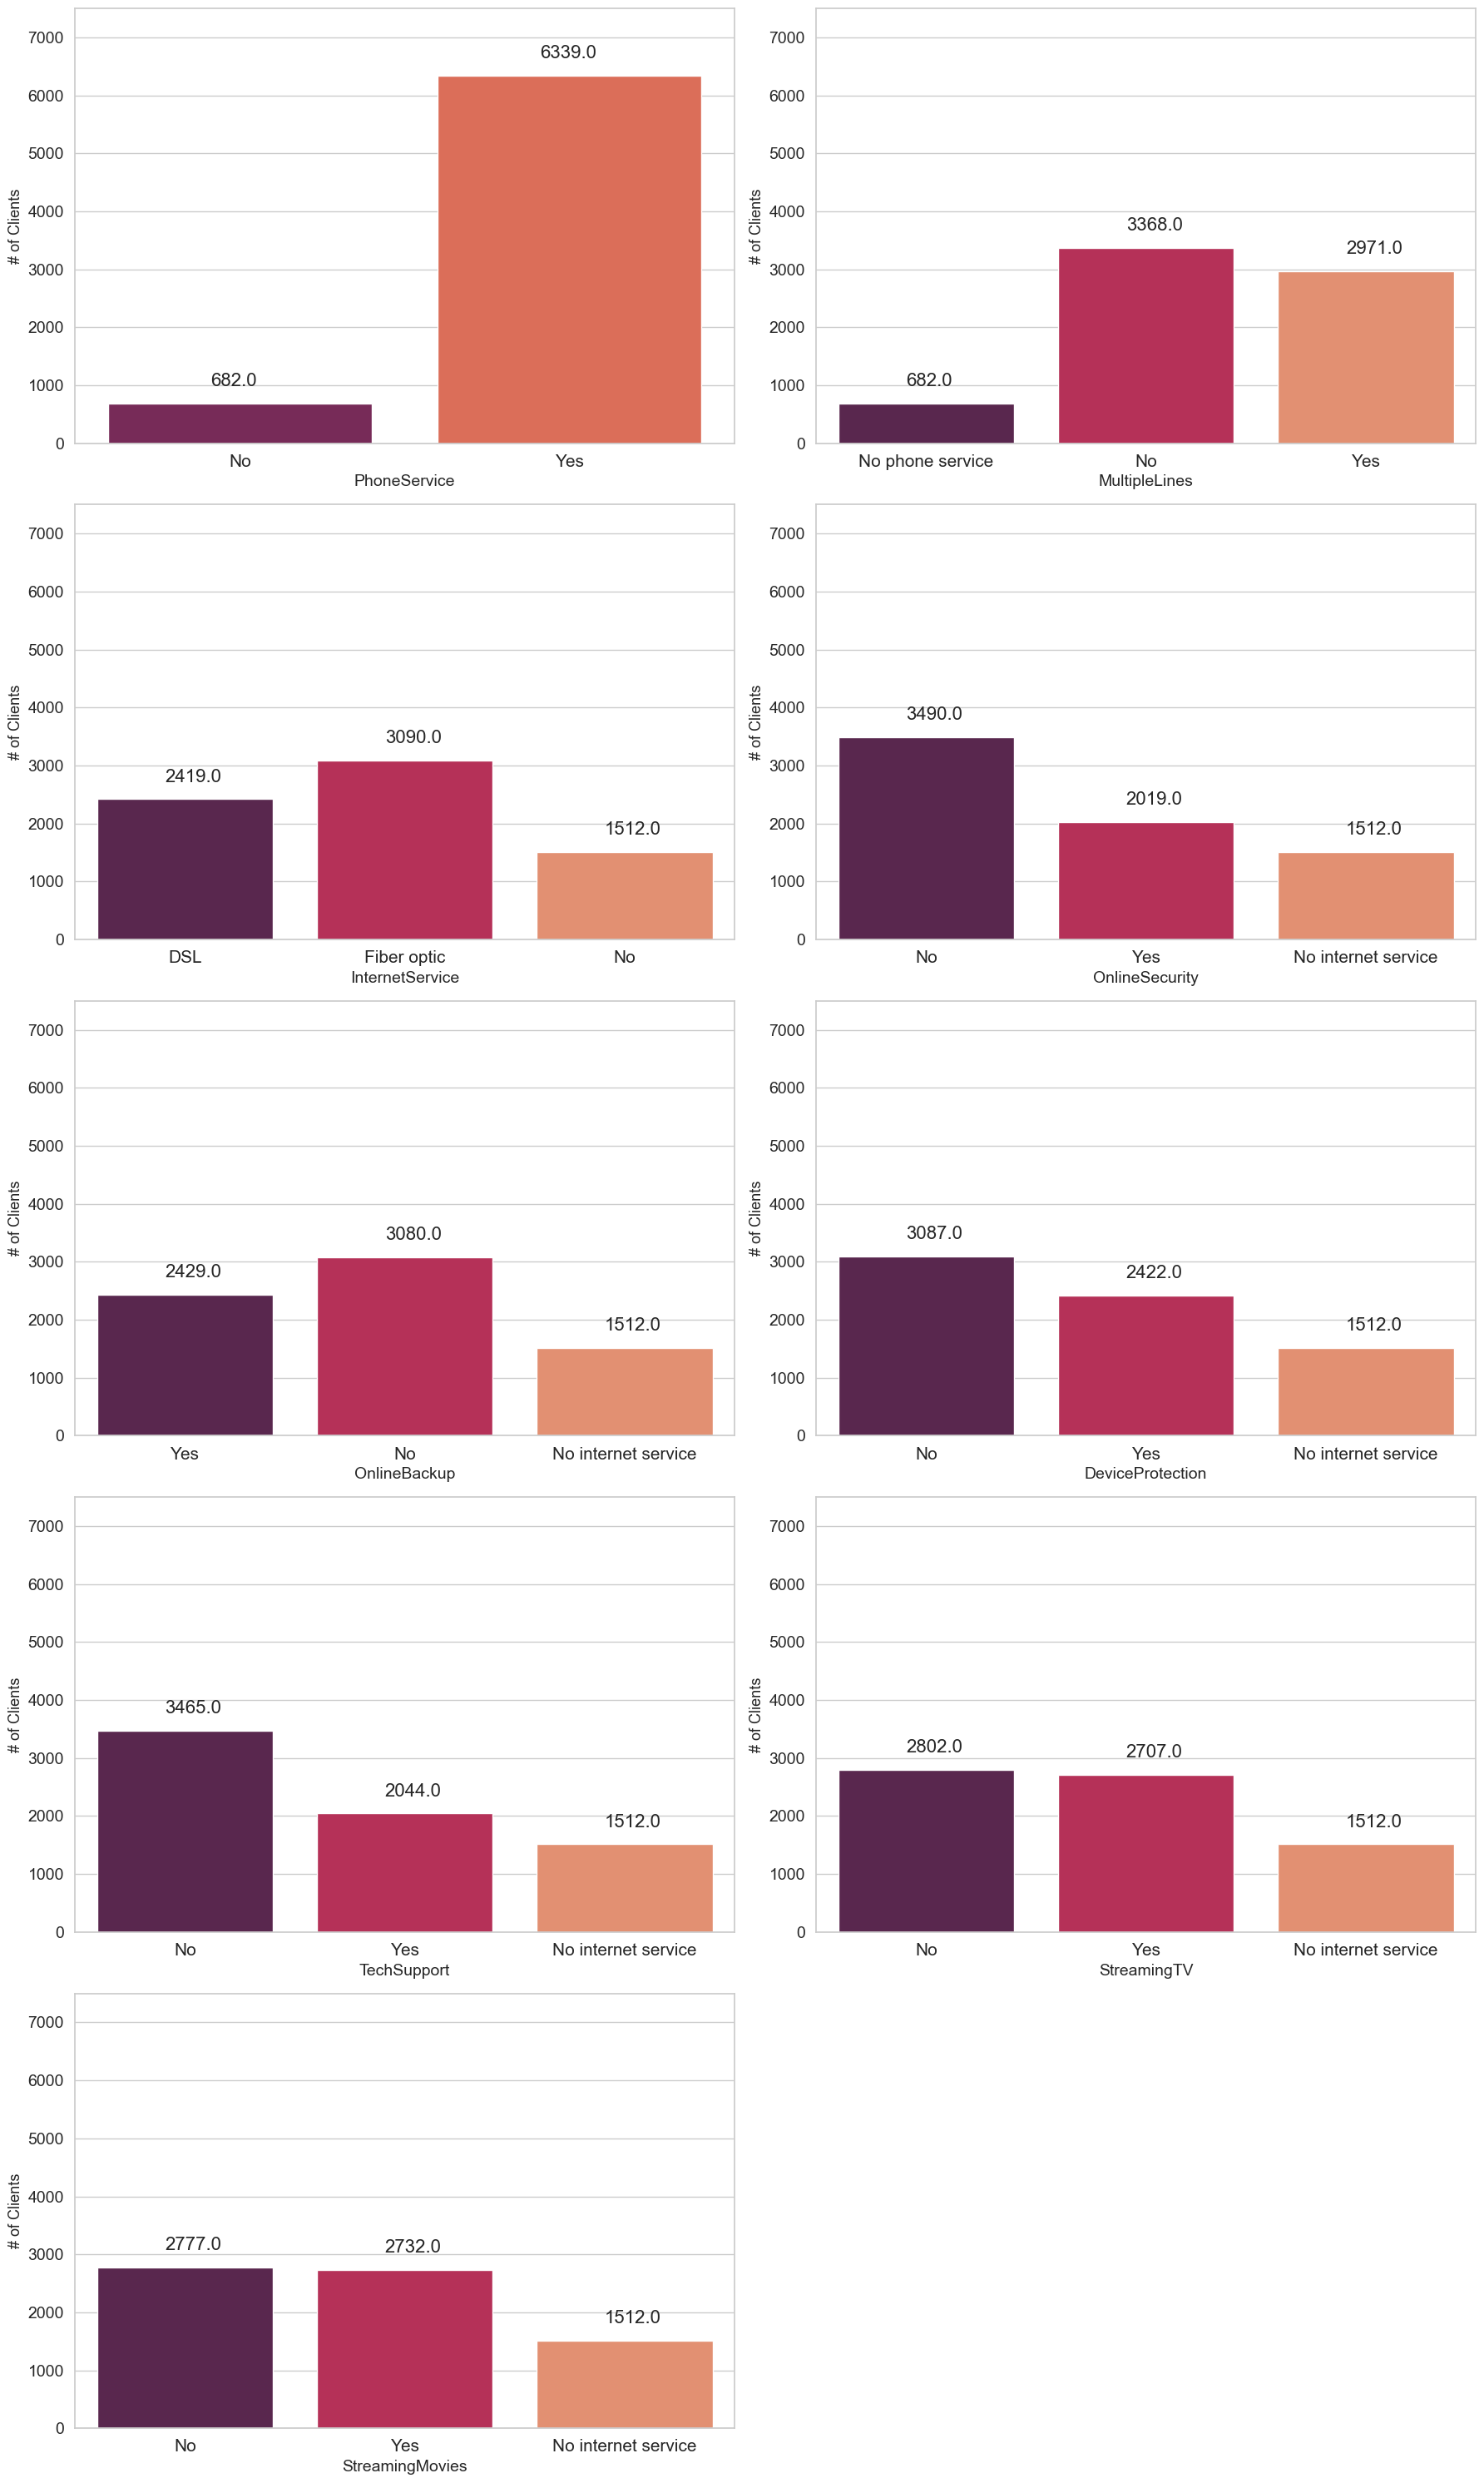

In [126]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

A relatively small group of customers doesn’t have internet services and an even smaller one doesn’t have phone services. One thing to keep in mind is that most services can be and/or are only provided to customers who sign the Telco’s internet service.

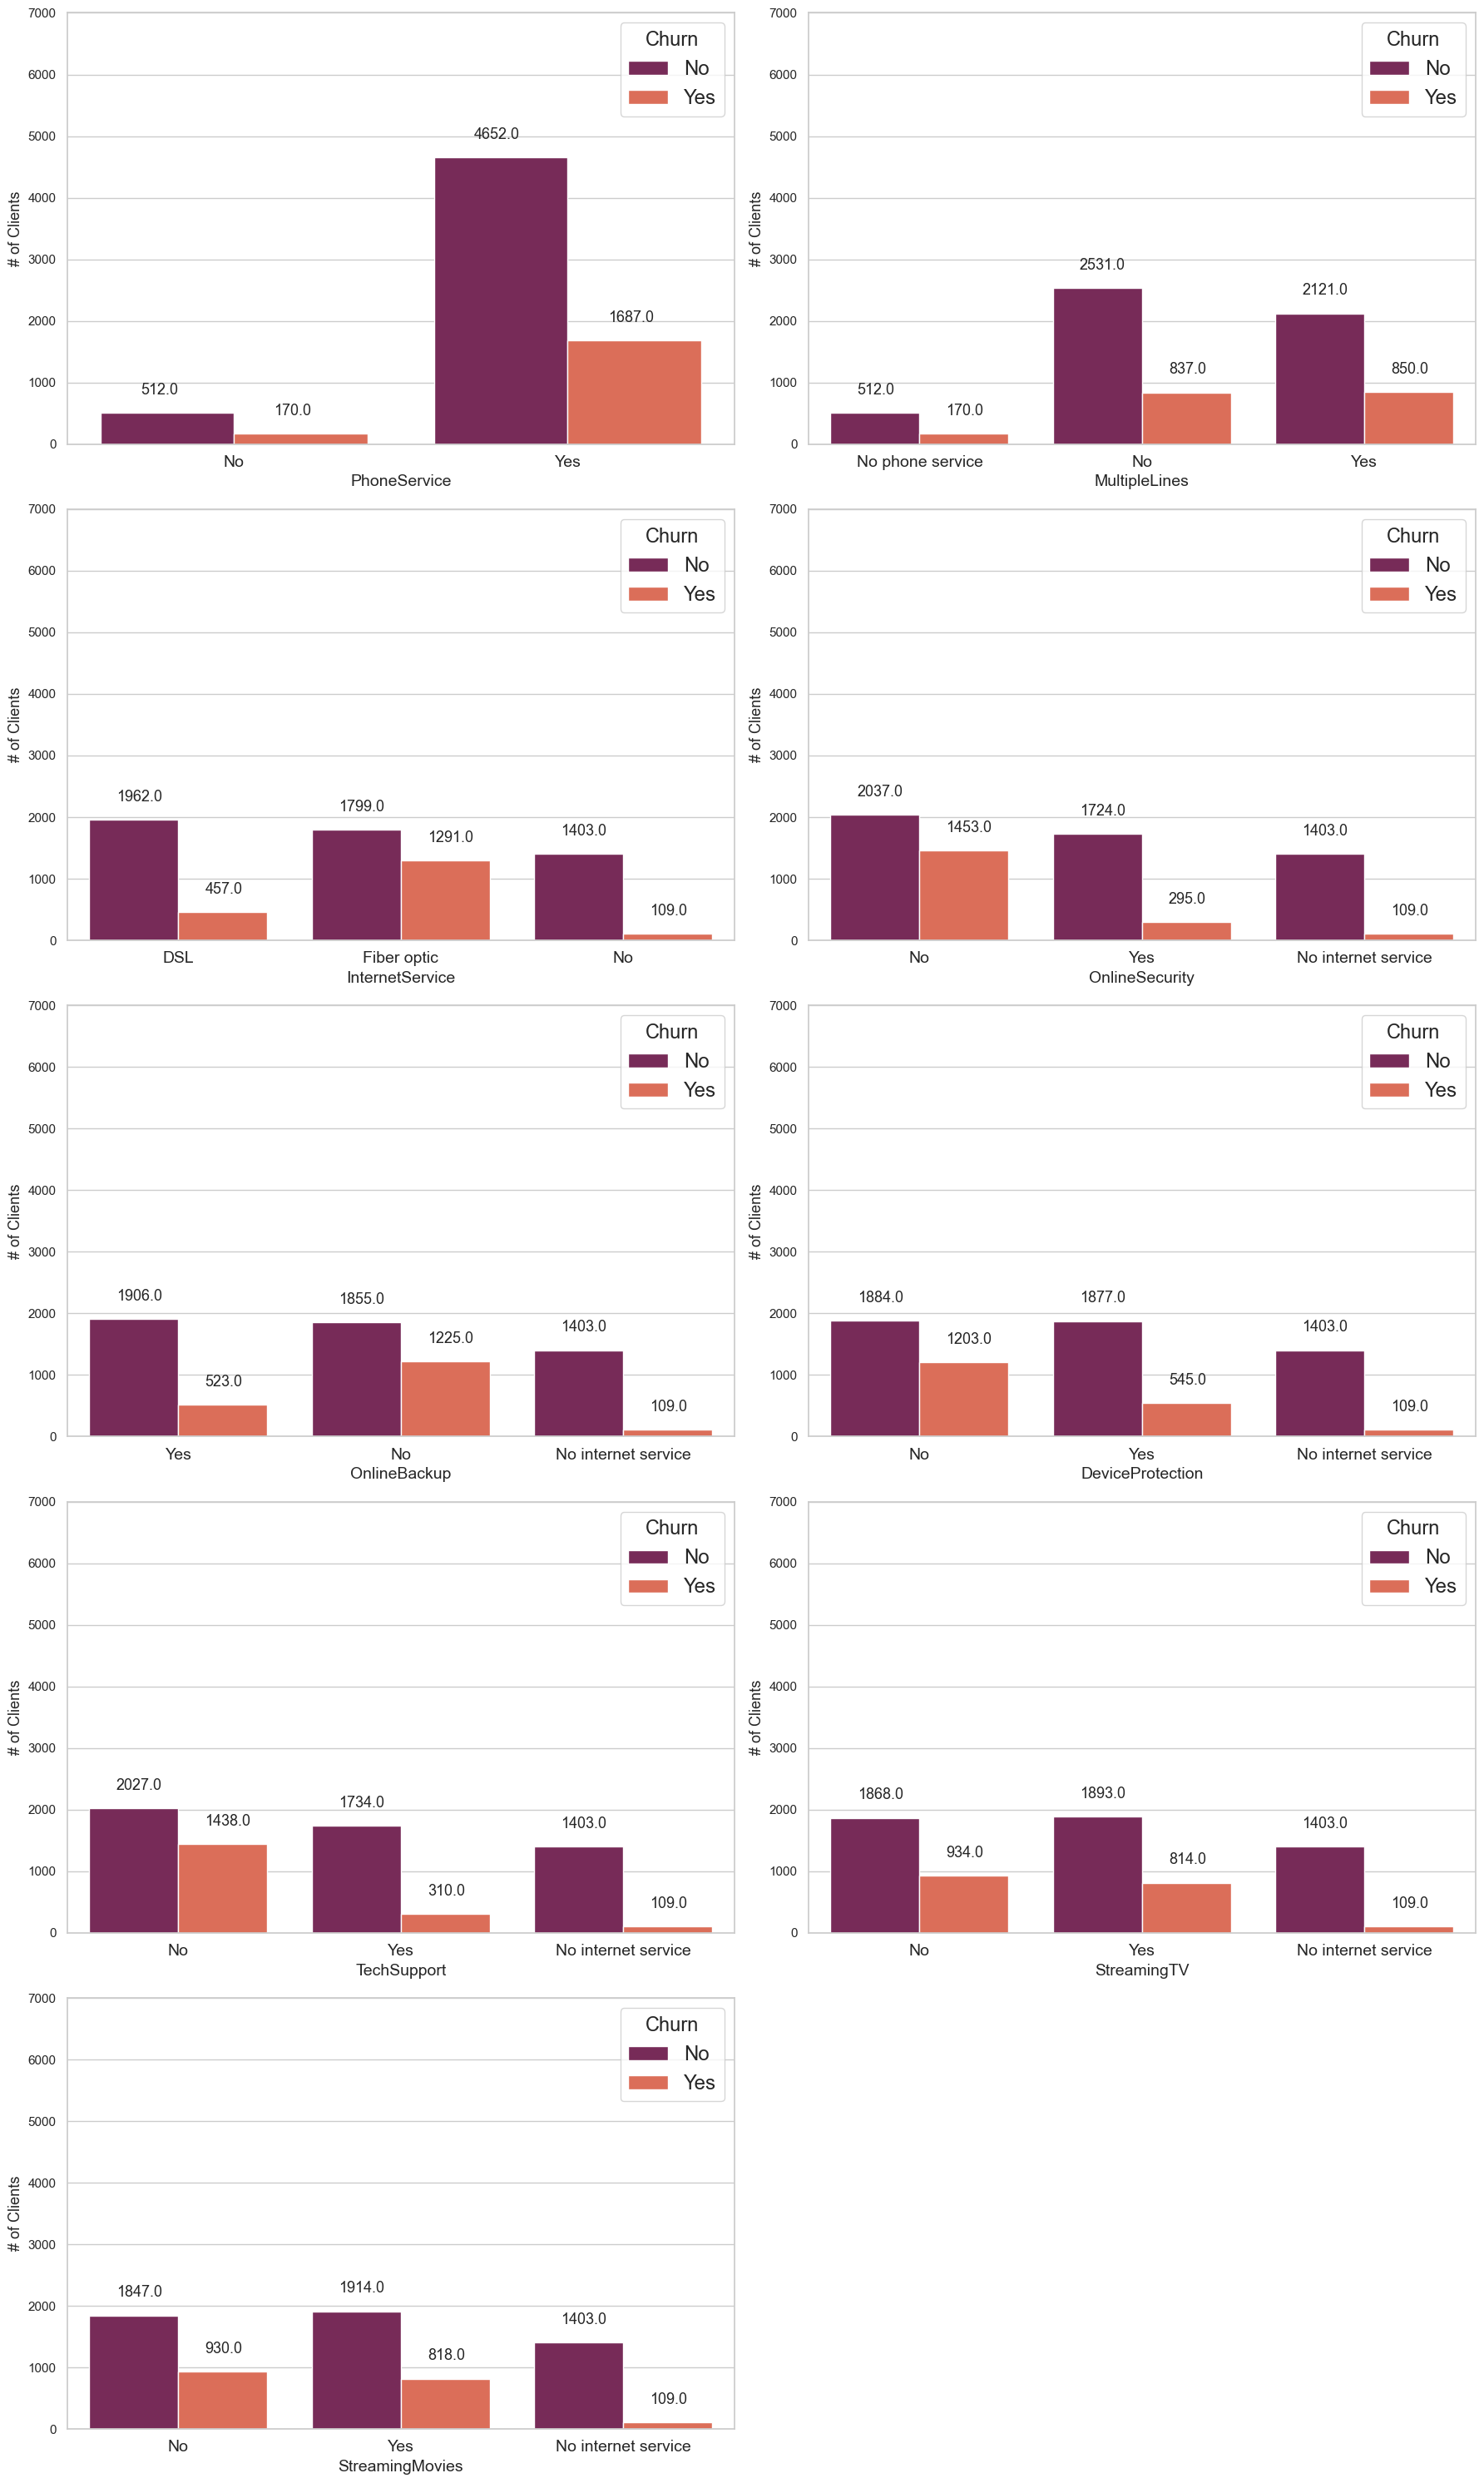

In [130]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

Curiously enough, the difference of churn between clients with and without phone services is quite small, been negligible if we take those with multiple lines out of equation. In this group of features, the real game-changing ones in terms of customer retainment are those related to internet services.

In the feature ‘InternetServices’, the percentage of churn in each category is highly different one from another. Those who don’t subscribe to the company’s internet (presumably, they only use their phone service), are the most likely to endure as their customers. The likelihood of churn from customers with DSL service is also smaller than the overall probability.

The highest percentage of churn, with over 40%, is from customers with fiber optic internet. Fiber optic tends to be faster than DSL internet, but their subscription is usually more expensive as well. We don't have the information about the fee for each service, but at least we can find the mean value of monthly charges per type of internet just to have an idea that this is the case.

In [132]:
df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

InternetService
No             21.087765
DSL            58.112588
Fiber optic    91.542427
Name: MonthlyCharges, dtype: float64

As expected, the average charges for each service are significantly different, with fiber optic been the most expensive. Without any additional information, it’s hard to draw definitive conclusions, but it seems that the cost-benefit relationship of their fiber optic service is far from been attractive enough to retain customers.

Such a high churn rate might indicate that their service’s quality is subpar in terms of speed and/or reliability. Analyzing complaints received by their customer service call center service to extract useful and specific information about their internet is a must. A survey with a significant group of customers, aiming to understand how they perceive the quality of the service, is another step to find the problem and to help defining the course of action.

As for the other services, the likelihood of churn from customers who have each one of them is actually lower than from those who haven’t. The higher differences are found in ‘TechSupport’ and ‘OnlineSecurity’, while the lower ones are found in the streaming services.

Let’s calculate the average monthly charges from each category in the Tech Support and Online Security features.

In [134]:
print(df.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
No internet service    21.087765
No                     74.611905
Yes                    80.680137
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
No internet service    21.087765
No                     75.720645
Yes                    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineSecurity       TechSupport        
No internet service  No internet service    21.087765
No                   No                     74.221454
Yes                  No                     75.692011
No                   Yes                    79.758148
Yes                  Yes                    81.472930
Name: MonthlyCharges, dtype: float64


Both services don’t seem to affect the subscription charges by much. If the company can quantify the cost of providing each service per customer and find out that it is relatively small, they could either reduce the extra subscription fee for those additional services or simply cut that fee and offer those services as standard for internet customers for a trial period. Given that most customers don’t subscribe to those services and given that they have a significant impact on the customer retainment, it’s possible that such strategy could result in a higher profit on the long term.

Let’s see if the churn rate gets significantly lower for customers who have access to both services.

# Checking distributions

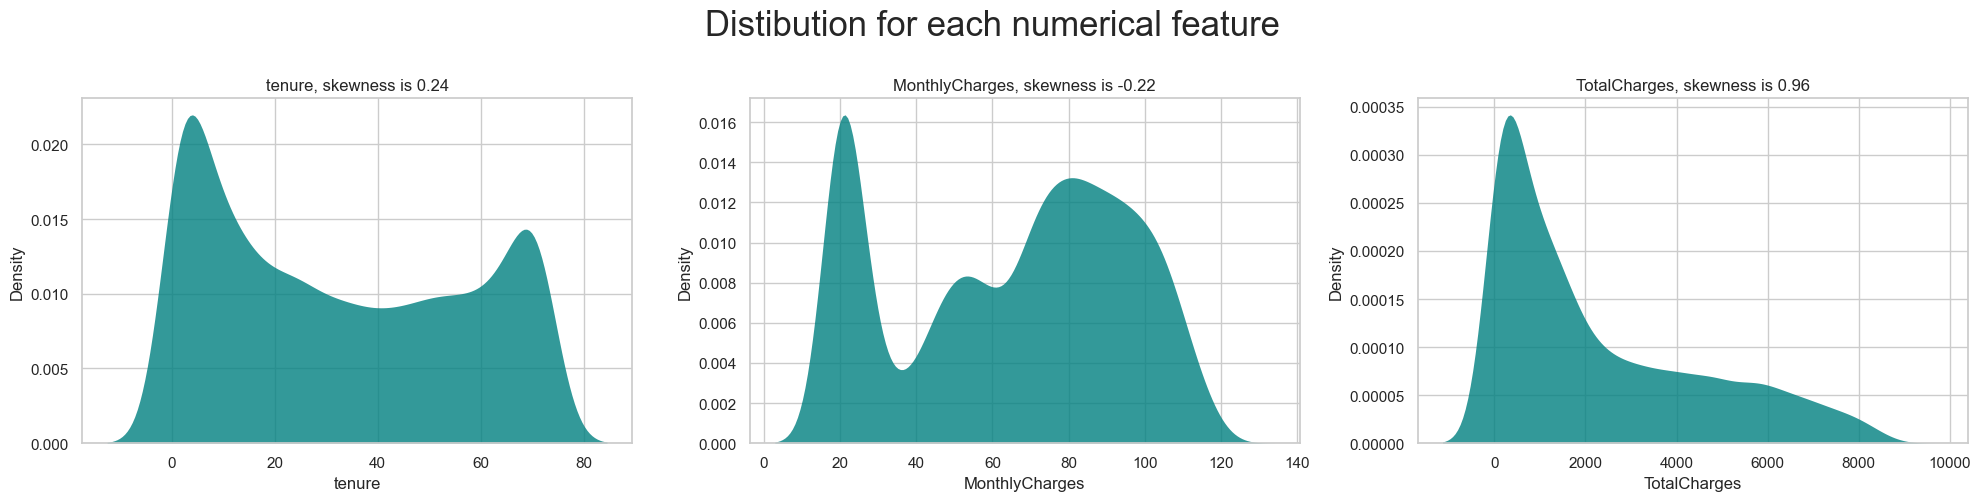

In [142]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

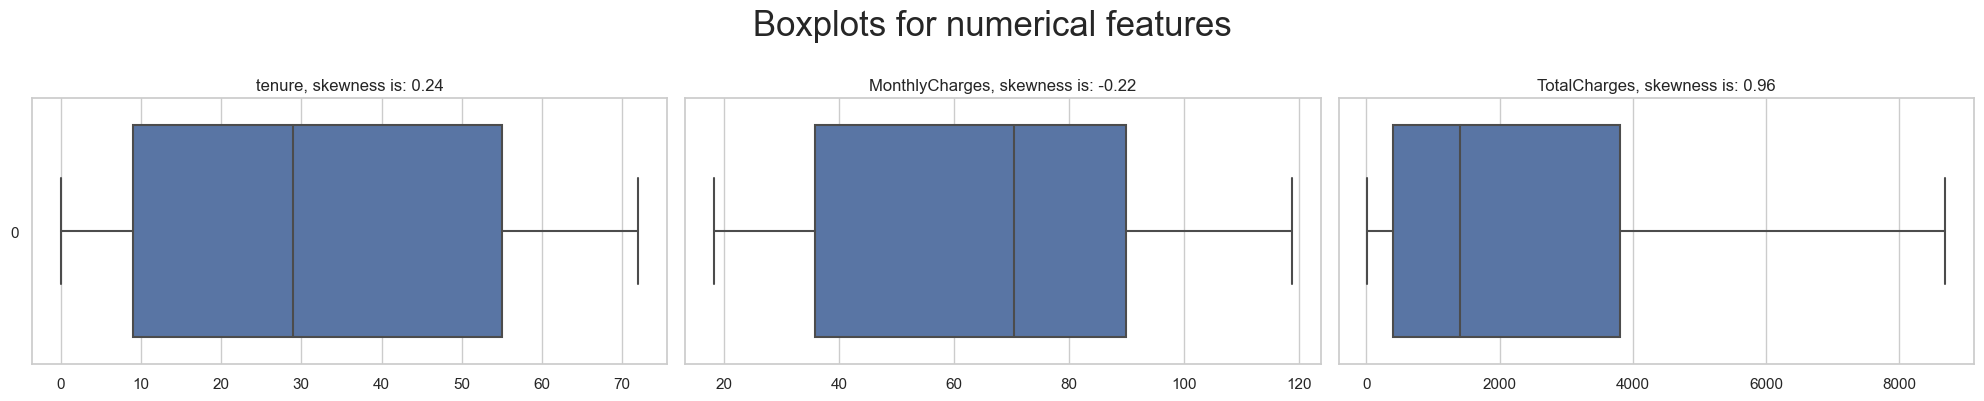

In [146]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,4))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=3, suptitle='Boxplots for numerical features')
plt.tight_layout()

variables are not normally distributed;
tenure and MonthlyCharges created kind of a bimodal distribution;
TotalCharges is rightly skewed.

# Create Features

using label encoding for binary variables and one-hot encoding for categorical variables with more than two unique values.

create a LabelEncoder instance.
Identifies binary columns by selecting those with non-numeric dtype and having exactly two unique values.
Defines a function label_encoder to apply label encoding to a specified binary column.
Loops through each binary column and applies label encoding to it.

In [12]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    df = label_encoder(df, col)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Defines a function one_hot_encoder to apply one-hot encoding to specified categorical columns.
Identifies categorical columns (ohe_cols) by selecting those with more than two and at most 30 unique values.
Applies one-hot encoding to the identified categorical columns in the DataFrame, 
with an option to drop the first column to avoid multicollinearity (controlled by the drop_first parameter).
In summary, this script preprocesses a DataFrame by label encoding binary variables and one-hot 
encoding categorical variables with more than two unique values. 
The resulting DataFrame (df) will have encoded features suitable for machine learning models that require numerical input.

In [16]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 30 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)


In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2285.169963,2267.544511,18.80,401.675,1398.25,3803.05,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

<Axes: >

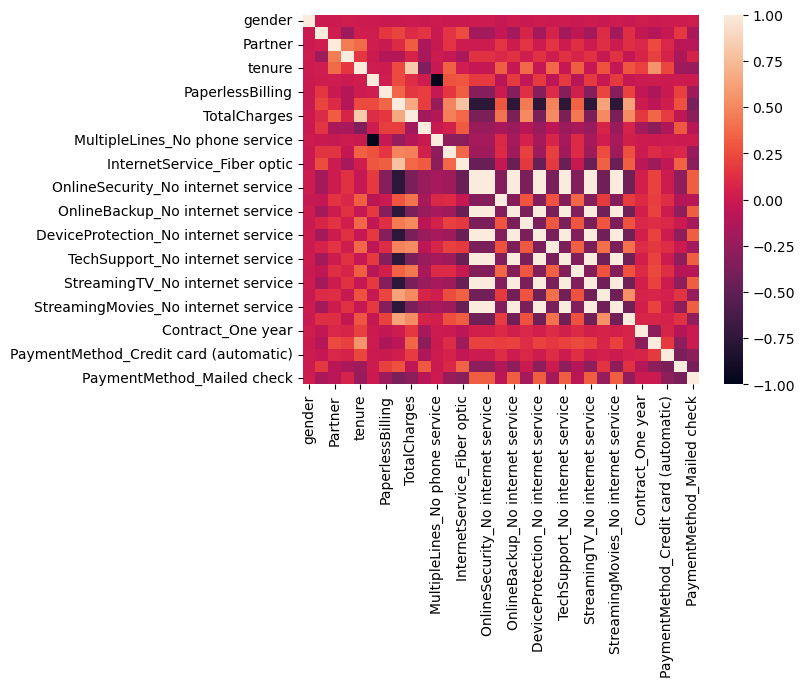

In [29]:
sns.heatmap(df.corr())

In [35]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

# Feature Scaling with StandardScaler

applying standardization using StandardScaler to ensure that all numerical features have similar scales. This is important for many machine learning algorithms, as it can help improve the model's performance and convergence.

Creates an instance of the StandardScaler. 
The StandardScaler standardizes features by removing the mean and scaling to unit variance.
Applies the scaler to the selected numerical columns (numeric_columns) in the DataFrame (df). 
It transforms the data, making it have a mean of 0 and a standard deviation of 1.
The transformed values are then assigned back to the original DataFrame, 
replacing the original numerical columns with the scaled values.

In [37]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [40]:
df[numeric_columns].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994680
1,0.066327,-0.259629,-0.174505
2,-1.236724,-0.362660,-0.960146
3,0.514251,-0.746535,-0.196006
4,-1.236724,0.197365,-0.940961


# Model Building

### Train Test Split

In [42]:
y = df['Churn']
X = df.drop(["Churn"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

### RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Predictions on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predictions on the testing set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the accuracy scores
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.9984
Testing Accuracy: 0.7875


### LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))

Training Accuracy : 0.8097363083164301
Testing Accuracy : 0.79649787032655


### DecisionTree

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(X_train, y_train)
print("Training Accuracy :", classifier_dt.score(X_train, y_train))
print("Testing Accuracy :", classifier_dt.score(X_test, y_test))

Training Accuracy : 0.9983772819472616
Testing Accuracy : 0.7274017983909133


### Ensemble Learning

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [58]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [59]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [61]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X_train, y_train,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.79
knn 0.77


In [68]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X_test, y_test,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.79
rf 0.79
knn 0.76


### KNN

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

In [72]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
pred = knn.fit(X_train, y_train).predict(X_test)
pred

array([0, 1, 1, ..., 0, 1, 0])

In [74]:
print(confusion_matrix(y_test, pred).T)

[[1319  262]
 [ 220  312]]


In [77]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.834     0.857     0.846      1539
           1      0.586     0.544     0.564       574

    accuracy                          0.772      2113
   macro avg      0.710     0.700     0.705      2113
weighted avg      0.767     0.772     0.769      2113



## Naive Bayes 

In [83]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

In [85]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy test(in %):", metrics.accuracy_score(y_test, y_pred)*100)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy train(in %):", metrics.accuracy_score(y_train, y_pred_train)*100)

Gaussian Naive Bayes model accuracy test(in %): 67.58163748225272
Gaussian Naive Bayes model accuracy train(in %): 66.67342799188641
